# Proyecto ecuacion de calor en Python
Utilizando el metodo de diferencias finitas para resolver la ecuacion en dos dimensiones espaciales.

In [1]:
import numpy as np

def ftcs_calor(Ti, Td, Tar, Tab, Tp, kappa, L, a, M, N, h, t_fin):
    T = np.zeros((M+1, N+1), dtype = float)
    #condiciones iniciales
    T[:, 0] = Ti
    T[:, N] = Td
    T[0, :] = Tar
    T[M, :] = Tab
    T[1:M, 1:N] = Tp
    
    #arreglo para hacer las operaciones con FTCS
    Tk = np.zeros((M+1, N+1), dtype = float)
    Tk[0:M+1, 0] = Ti
    Tk[0:M+1, N] = Td
    Tk[0, 0:N+1] = Tar
    Tk[M, 0:N+1] = Tab

    #Los otros parametros
    t = 0.0
    dy= a/N  #Particiones del ancho
    dx = L/M  #Partciones del largo
    d1 = dy/dx  #dy/dx que es parte de la formula
    d2 = dx/dy  #dx/dy que es parte de la formula
    Fo = (kappa*t_fin)/(dy*dx)  #numero de Fourier

    #Aqui se implementa el FTCS
    while t < t_fin:
        for j in range(1,N):
            for i in range(1,M):
                Tk[i,j] = Fo*(d1*(T[i-1,j] + T[i+1,j] - 2*T[i,j]) + d2*(T[i,j+1] + T[i,j-1] - 2*T[i,j])) + T[i,j]
                
        T = Tk
        t += h
    return T
        

In [8]:
valores = ftcs_calor(100, 0, 0, 120, 10, 22.8e-6, 10, 8, 50, 40, 1e-4, 30)

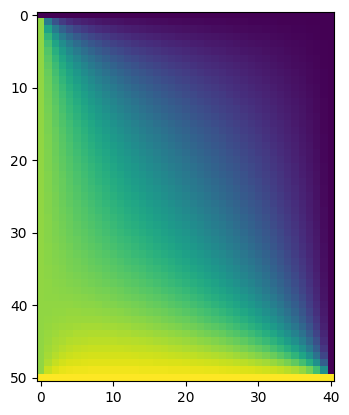

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(valores)
plt.show()

Prueba con codigo vectorial de numpy:

In [4]:
import numpy as np

def ftcs_calor(Ti, Td, Tar, Tab, Tp, kappa, L, a, M, N, h, t_fin):
    T = np.zeros((M+1, N+1), dtype=float)
    # Condiciones iniciales
    T[:, 0] = Ti
    T[:, N] = Td
    T[0, :] = Tar
    T[M, :] = Tab
    T[1:M, 1:N] = Tp
    
    # Arreglo para hacer las operaciones con FTCS
    Tk = np.copy(T)  # Crear una copia de T
    
    # Otros parámetros
    t = 0.0
    dy = a / N  # Particiones del ancho
    dx = L / M  # Particiones del largo
    d1 = dy / dx  # dy/dx que es parte de la formula
    d2 = dx / dy  # dx/dy que es parte de la formula
    Fo = (kappa * t_fin) / (dy * dx)  # Número de Fourier

    # Implementación del FTCS
    while t < t_fin:
        Tk[1:M, 1:N] = Fo * (d1 * (T[0:M-1, 1:N] + T[2:M+1, 1:N] - 2*T[1:M, 1:N]) + d2 * (T[1:M, 0:N-1] + T[1:M, 2:N+1] - 2*T[1:M, 1:N])) + T[1:M, 1:N]
        
        T = np.copy(Tk)  # Actualizar T con los nuevos valores de Tk
        t += h

    return T

In [5]:
valores_p = ftcs_calor(20, 20, 20, 20, 10, 22.8e-6, 10, 8, 50, 40, 1e-4, 30)

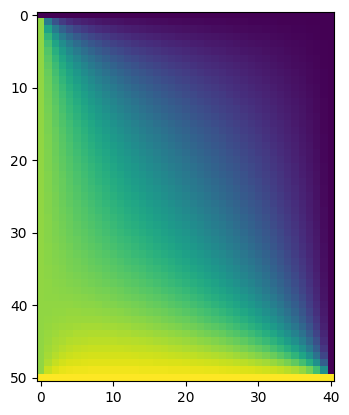

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(valores_p)
plt.show()

El codigo anterior pero haciendo la animacion del mapa de calor:

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-framerate', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpr3yms9eb/temp.m4v']' returned non-zero exit status 255.

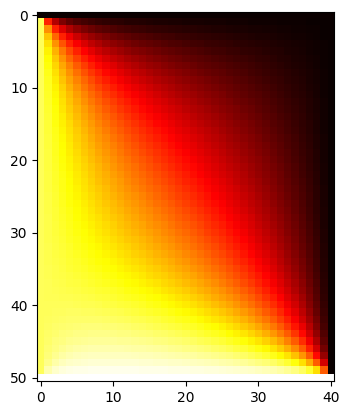

In [26]:
from matplotlib.animation import FuncAnimation
from IPython import display

def ftcs_calor_animacion(Ti, Td, Tar, Tab, Tp, kappa, L, a, M, N, h, t_fin):
    T = np.zeros((M+1, N+1), dtype=float)
    # Condiciones iniciales
    T[:, 0] = Ti
    T[:, N] = Td
    T[0, :] = Tar
    T[M, :] = Tab
    T[1:M, 1:N] = Tp
    
    # Arreglo para hacer las operaciones con FTCS
    Tk = np.copy(T)  # Crear una copia de T
    
    # Otros parámetros
    t = 0.0
    dy = a / N  # Particiones del ancho
    dx = L / M  # Particiones del largo
    d1 = dy / dx  # dy/dx que es parte de la formula
    d2 = dx / dy  # dx/dy que es parte de la formula
    Fo = (kappa * t_fin) / (dy * dx)  # Número de Fourier
    
    fig, ax = plt.subplots()
    heatmap = ax.imshow(T, cmap='hot', interpolation='nearest')

    def update(frame):
        nonlocal T
        T[1:M, 1:N] = Fo * (d1 * (T[0:M-1, 1:N] + T[2:M+1, 1:N] - 2*T[1:M, 1:N]) + d2 * (T[1:M, 0:N-1] + T[1:M, 2:N+1] - 2*T[1:M, 1:N])) + T[1:M, 1:N]
        heatmap.set_data(T)
        return [heatmap]

    ani = FuncAnimation(fig, update, frames=np.arange(0, t_fin, h), interval=100, blit=True)

    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

anima = ftcs_calor_animacion(100, 0, 0, 120, 10, 22.8e-6, 10, 8, 50, 40, 1e-4, 30)